# 📊 Tugas Besar Pembelajaran Mesin - Clustering

## 👨‍🏫 Universitas Widyatama  
**Mata Kuliah:** Pembelajaran Mesin  
**Semester:** Genap 2024/2025  
**Topik:** Clustering Menggunakan K-Means (CPU vs GPU)  
**Kelompok:**  
- Danang (23508018)  
- Iwan (23508019)  
- Sari (23508020)

---

## 🧩 Studi Kasus
Pada tugas ini kami melakukan eksplorasi teknik **Clustering** menggunakan algoritma **K-Means**. Fokus utama adalah membandingkan hasil dan performa antara implementasi K-Means berbasis **CPU (sklearn)** dan **GPU (cuML)**.

Dataset yang digunakan dipilih dari sumber terpercaya dan mencakup beberapa skala ukuran data, dari kecil hingga sangat besar, untuk melihat pengaruh skala terhadap performa.

---

## 🎯 Tujuan
- Menerapkan algoritma **K-Means Clustering** pada berbagai dataset.
- Melakukan **Preprocessing** dan **Normalisasi** data.
- Menjalankan program K-Means menggunakan **CPU** dan **GPU**.
- Melakukan **evaluasi performa** dan **hasil cluster**.
- Menyimpulkan efektivitas penggunaan GPU dalam proses clustering skala besar.

---

## 📏 Kategori Ukuran Dataset

Dalam proyek ini, kami menentukan **kategori ukuran dataset** berdasarkan **jumlah baris (row / sample)**, karena algoritma Clustering seperti K-Means bekerja dengan menghitung jarak antar data point. Oleh karena itu, jumlah instance menjadi faktor utama yang memengaruhi beban komputasi dan efisiensi, terutama saat dibandingkan antara CPU dan GPU.

### 📊 Tabel Kategori Ukuran Dataset

| Kategori       | Jumlah Baris (Row)      |
|----------------|--------------------------|
| **Kecil**       | < 1.000                  |
| **Sedang**      | 1.000 – 10.000           |
| **Besar**       | 10.000 – 100.000         |
| **Sangat Besar**| > 100.000                |

---

## 📁 Struktur Notebook
1. 📥 **Import Library & Persiapan Lingkungan**
2. 📂 **Load Dataset**
3. 🧼 **Preprocessing & Normalisasi**
4. 🔁 **Implementasi K-Means (CPU & GPU)**
5. 🧪 **Evaluasi dan Komparasi**
6. 📈 **Visualisasi Cluster**
7. 📊 **Significant Test: CPU vs GPU**
8. 📝 **Kesimpulan Akhir**

---

## ⚙️ Dokumentasi Environtment dengan Instalasi RAPIDS cuML dan library lainnya

Untuk menjalankan algoritma **K-Means menggunakan GPU**, kami menggunakan pustaka **RAPIDS `cuML`**, yang dikembangkan oleh NVIDIA dan hanya dapat diinstal melalui `conda`.

### 📦 Syarat Sistem:
- GPU NVIDIA Volta™ atau lebih tinggi dengan compute capability 7.0+
- Distribusi Linux yang kompatibel atau WSL2 pada Windows 11
- Versi CUDA dan driver NVIDIA terbaru yang sesuai. Cek dengan: nvidia-smi

### 🧱 Langkah-Langkah Instalasi

#### 1. Jalankan install script rapids
```bash
wget "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
bash Miniforge3-$(uname)-$(uname -m).sh
```
#### 2. Install RAPIDS cuML
```bash
conda create -n nama_environtment -c rapidsai -c conda-forge -c nvidia rapids=25.04 python=3.12 cuda-version=12.8
conda activate nama_environtment
```
#### 4. Install library cuML
```bash
pip install \
  --extra-index-url=https://pypi.nvidia.com \
  cuml-cu12==25.4.* \
```
#### 5. Install library lainnya
```bash
pip install \
  pandas \
  numpy \
  scikit-learn \
  matplotlib \
  seaborn \
  kagglehub \
```
### 6. Install Jupyter Notebook
```bash
conda install notebook ipykernel -y
python -m ipykernel install --user --name nama_environment --display-name "Nama Project"
```
---

### 1. 📥 **Import Library & Persiapan Lingkungan**

- Install (check) semua library yang diperlukan.

In [304]:
%pip install kagglehub numpy pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


- Download dataset dari Kaggle.

In [1]:
import kagglehub

path_data_kecil = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
path_data_besar = kagglehub.dataset_download("prasad22/healthcare-dataset")

100%|██████████| 2.91M/2.91M [00:20<00:00, 152kB/s]

Extracting files...


---

### 2. 📂 **Load Dataset**

In [4]:
import pandas as pd

df_kecil = pd.read_csv(path_data_kecil + "/Students Social Media Addiction.csv")

print(f"Jumlah baris data kecil: {df_kecil.shape[0]}")
print(path_data_besar)

display(df_kecil.head())

Jumlah baris data kecil: 705
/home/rizkyfauziilmi/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


---

### 3. 🧼 **Preprocessing & Normalisasi**

- Hapus Kolom yang Tidak Relevan

In [292]:
df_kecil = df_kecil.drop(columns=["Student_ID"])

display(df_kecil.head())

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


- Cek dan Tangani Missing Values (Null / NaN)

In [293]:
df_kecil.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

- Cek Outlier

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
def plot_boxplots(dataframe: pd.DataFrame, before_outlier: bool = True) -> None:
    """
    Menampilkan boxplot untuk setiap kolom numerik pada dataframe dalam satu kesatuan graf.

    Parameter:
    ----------
    dataframe : DataFrame
        DataFrame yang akan divisualisasikan.
    before_outlier : bool, default=True
        Jika True, judul boxplot menandakan sebelum deteksi outlier.
        Jika False, menandakan setelah penanganan outlier.
    """
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    n_cols = len(numeric_columns)
    plt.figure(figsize=(max(8, 2 * n_cols), 3))
    sns.boxplot(data=dataframe[numeric_columns], orient="h")
    plt.title(f'Boxplot Semua Kolom Numerik {"(Sebelum Deteksi Outlier)" if before_outlier else "(Setelah Penanganan Outlier)"}')
    plt.xlabel("Value")
    plt.show()

def handle_outliers_iqr(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Mendeteksi dan menangani outlier pada kolom numerik menggunakan metode IQR.
    Outlier akan di-clipping ke persentil 5% dan 95%.

    Parameter:
    ----------
    dataframe : DataFrame
        DataFrame yang akan diproses.

    Return:
    -------
    DataFrame
        DataFrame baru dengan outlier yang sudah ditangani.
    """
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    total_outliers = 0
    columns_with_outliers = []

    if numeric_columns.empty:
        print("Tidak ada kolom numerik untuk memeriksa outlier.")
        return dataframe

    print(f"Kolom numerik yang akan diperiksa: {', '.join(numeric_columns)}")
    df_no_outlier = dataframe.copy()


    print("Boxplot sebelum deteksi outlier:")
    plot_boxplots(dataframe, before_outlier=True)
    print("Mendeteksi outlier menggunakan metode IQR...")
    # Mendeteksi outlier menggunakan metode IQR
    for col in numeric_columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        n_outliers = outliers.shape[0]
        total_outliers += n_outliers

        if n_outliers > 0:
            columns_with_outliers.append(col)
            print(f"Terdapat {n_outliers} outlier pada kolom '{col}'.")
        else:
            print(f"Tidak ditemukan outlier pada kolom '{col}'.")

    if total_outliers > 0:
        print(f"\nTotal outlier yang terdeteksi: {total_outliers}. Akan dilakukan clipping ke persentil 5% dan 95%.")
        for col in columns_with_outliers:
            print(f"Menangani outlier pada kolom '{col}' dengan clipping...")
            lower = dataframe[col].quantile(0.05)
            upper = dataframe[col].quantile(0.95)
            df_no_outlier[col] = dataframe[col].clip(lower=lower, upper=upper)
        print("Penanganan outlier selesai.\n")
    else:
        print("\nTidak ada outlier yang perlu ditangani.")

    print("Boxplot setelah penanganan outlier:")
    plot_boxplots(df_no_outlier, before_outlier=False)
    
    return df_no_outlier


Kolom numerik yang akan diperiksa: Age, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score, Conflicts_Over_Social_Media, Addicted_Score
Boxplot sebelum deteksi outlier:


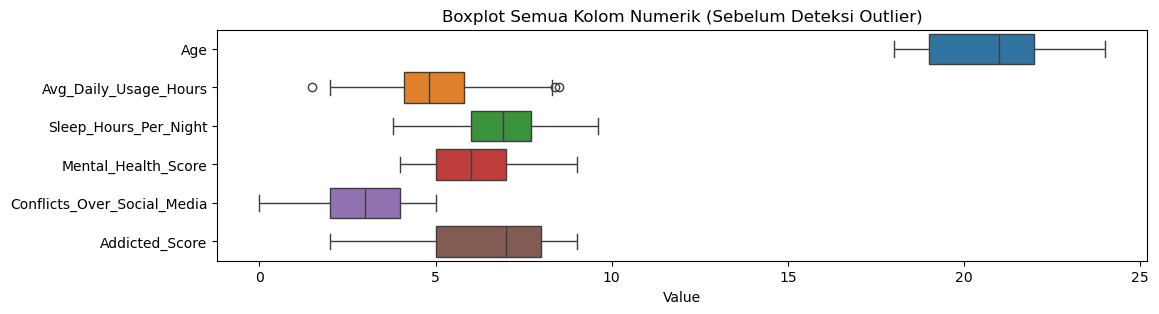

Mendeteksi outlier menggunakan metode IQR...
Tidak ditemukan outlier pada kolom 'Age'.
Terdapat 3 outlier pada kolom 'Avg_Daily_Usage_Hours'.
Tidak ditemukan outlier pada kolom 'Sleep_Hours_Per_Night'.
Tidak ditemukan outlier pada kolom 'Mental_Health_Score'.
Tidak ditemukan outlier pada kolom 'Conflicts_Over_Social_Media'.
Tidak ditemukan outlier pada kolom 'Addicted_Score'.

Total outlier yang terdeteksi: 3. Akan dilakukan clipping ke persentil 5% dan 95%.
Menangani outlier pada kolom 'Avg_Daily_Usage_Hours' dengan clipping...
Penanganan outlier selesai.

Boxplot setelah penanganan outlier:


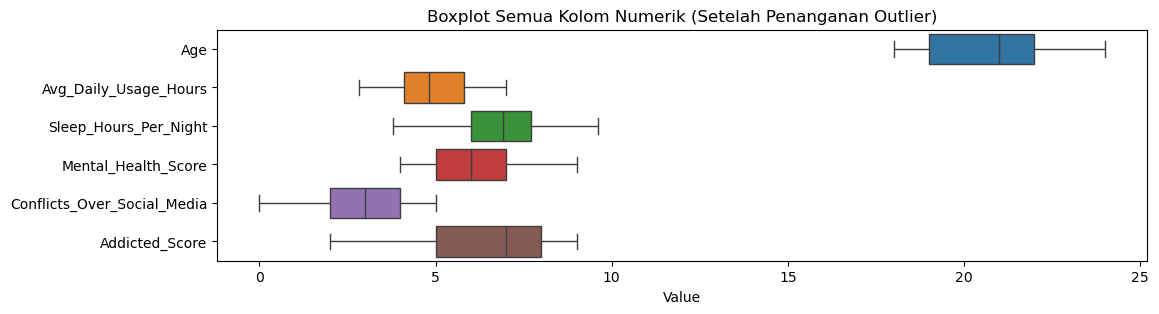

In [296]:
df_kecil = handle_outliers_iqr(df_kecil)

- Ubah Data Kategori ke Numerik

In [297]:
def encode_categorical_columns(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Melakukan encoding pada kolom kategorikal menggunakan one-hot encoding.

    Parameter:
    ----------
    dataframe : DataFrame
        DataFrame yang akan diproses.

    Return:
    -------
    DataFrame
        DataFrame baru dengan kolom kategorikal yang sudah di-encode.
    """
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    if categorical_columns.empty:
        print("Tidak ada kolom kategorikal untuk di-encode.")
        return dataframe

    print("Kolom kategorikal sebelum encoding:")
    display(dataframe[categorical_columns].head())
    print(f"Kolom kategorikal yang akan di-encode: {', '.join(categorical_columns)}")
    df_encoded = pd.get_dummies(dataframe, columns=categorical_columns, drop_first=True)
    df_encoded = df_encoded.astype(int)
    print("Encoding selesai.\n")
    print("Kolom kategorikal setelah encoding:")
    display(df_encoded.head())
    
    return df_encoded

In [298]:
df_kecil = encode_categorical_columns(df_kecil)

Kolom kategorikal sebelum encoding:


,Gender,Academic_Level,Country,Most_Used_Platform,Affects_Academic_Performance,Relationship_Status
0,Female,Undergraduate,Bangladesh,Instagram,Yes,In Relationship
1,Male,Graduate,India,Twitter,No,Single
2,Female,Undergraduate,USA,TikTok,Yes,Complicated
3,Male,High School,UK,YouTube,No,Single
4,Male,Graduate,Canada,Facebook,Yes,In Relationship


Kolom kategorikal yang akan di-encode: Gender, Academic_Level, Country, Most_Used_Platform, Affects_Academic_Performance, Relationship_Status
Encoding selesai.

Kolom kategorikal setelah encoding:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Academic_Level_High School,Academic_Level_Undergraduate,Country_Albania,...,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Affects_Academic_Performance_Yes,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5,6,6,3,8,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,22,2,7,8,0,3,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,20,6,5,5,4,9,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,18,3,7,7,1,4,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,21,4,6,6,2,7,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


- Pastikan Semua Kolom Bertipe Numerik

In [299]:
def check_data_all_numeric(df: pd.DataFrame) -> None:
    """
    Cek apakah semua kolom dalam DataFrame bertipe numerik.
    
    Parameter:
    ----------
    df : DataFrame
        DataFrame yang akan diperiksa.
    """
    all_numeric = all(df[col].dtype.kind in 'biufc' for col in df.columns)
    if all_numeric:
        print("Semua kolom dalam DataFrame adalah numerik.")
    else:
        print("Tidak semua kolom dalam DataFrame adalah numerik.")

In [300]:
check_data_all_numeric(df_kecil)

Semua kolom dalam DataFrame adalah numerik.


- 🔃 Tahap Normalisasi (Scaling)

In [301]:
from sklearn.preprocessing import MinMaxScaler

def normalize_minmax(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Melakukan normalisasi MinMaxScaler hanya pada kolom numerik
    yang rentangnya lebih dari 0–1 (bukan hasil one-hot encoding).
    
    Parameter:
    ----------
    dataframe : DataFrame
        DataFrame yang akan dinormalisasi.
        
    Return:
    -------
    DataFrame
        DataFrame baru dengan kolom numerik yang sudah dinormalisasi.
    """
    df_scaled = dataframe.copy()
    
    # Pilih kolom numerik
    numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns

    # Deteksi kolom yang perlu dinormalisasi (rentang nilai lebih dari 1)
    cols_to_scale = [
        col for col in numeric_columns 
        if df_scaled[col].max() - df_scaled[col].min() > 1
    ]

    print(f"Kolom yang akan dinormalisasi: {', '.join(cols_to_scale)}")

    # Lakukan MinMaxScaler pada kolom tersebut
    if cols_to_scale:
        print("Sebelum normalisasi:")
        display(df_scaled[cols_to_scale].head())
        scaler = MinMaxScaler()
        df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])
        print("Normalisasi selesai menggunakan MinMaxScaler.")
        print("Setelah normalisasi:")
        display(df_scaled[cols_to_scale].head())
        print("\n")
    else:
        print("Tidak ada kolom yang perlu dinormalisasi.\n")
    
    return df_scaled


In [302]:
df_kecil = normalize_minmax(df_kecil)

Kolom yang akan dinormalisasi: Age, Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score, Conflicts_Over_Social_Media, Addicted_Score
Sebelum normalisasi:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,19,5,6,6,3,8
1,22,2,7,8,0,3
2,20,6,5,5,4,9
3,18,3,7,7,1,4
4,21,4,6,6,2,7


Normalisasi selesai menggunakan MinMaxScaler.
Setelah normalisasi:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,0.166667,0.6,0.500000,0.4,0.6,0.857143
1,0.666667,0.0,0.666667,0.8,0.0,0.142857
2,0.333333,0.8,0.333333,0.2,0.8,1.000000
3,0.000000,0.2,0.666667,0.6,0.2,0.285714
4,0.500000,0.4,0.500000,0.4,0.4,0.714286


---

### 4. 🔁 **Implementasi K-Means (CPU & GPU)**

In [305]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [ ]:
# CPU
from sklearn.cluster import KMeans as KMeans_CPU
# GPU (RAPIDS cuML)
# from cuml.cluster import KMeans as KMeans_GPU

import time

ModuleNotFoundError: No module named 'cuml'